In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Restaurant Reviews

This is a simplified fictional example showing Simpson's Paradox: trends that are present when looking at a segmented version of the data can be reversed when aggregating the data. 

In [57]:
data = pd.DataFrame({'A Ratings': [8.0, 9.0], 'B Ratings': [6.5, 8.5], 
                     'A Number': [220, 50], 'B Number': [20, 650], 
                     'Gender': ['M', 'F']}).set_index('Gender')
data

,A Ratings,B Ratings,A Number,B Number
Gender,,,,
M,8.0,6.5,220,20
F,9.0,8.5,50,650


In [58]:
a_average = (data.loc[:, 'A Ratings'] * data.loc[:, 'A Number']).sum() / data.loc[:, 'A Number'].sum(axis=0)
b_average = (data.loc[:, 'B Ratings'] * data.loc[:, 'B Number']).sum() / data.loc[:, 'B Number'].sum(axis=0)


data.loc['Combined'] = [a_average, 
                        b_average, 
                        data['A Number'].sum(), 
                        data['B Number'].sum()]
data.round(2)

,A Ratings,B Ratings,A Number,B Number
Gender,,,,
M,8.00,6.50,220.0,20.0
F,9.00,8.50,50.0,650.0
Combined,8.19,8.44,270.0,670.0


# Hours of Exercise vs Chance of Developing Diabetes

This is another fictional example showing Simpson's Paradox in the context of a correlation. When looking at the data individually, there is a negative correlation between hours of exercise and chance of developing diabetes, but when aggregating the data, the correlation reverses! 

In [59]:
from numpy.polynomial.polynomial import polyfit

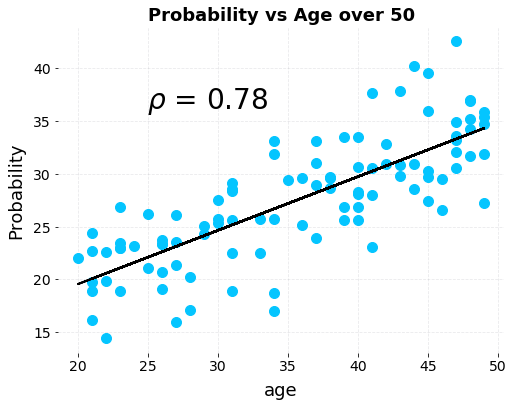

In [67]:
n_samples = 100
np.random.seed(42)
ages = np.random.randint(20, 50, n_samples)
hours = np.random.randint(1, 5, n_samples) + np.random.randn(n_samples)
p = 15 + 0.5 * ages + -2.1 * hours + np.random.randn(n_samples) *  2
under_50 = pd.DataFrame({'age': ages, 'Hours Exercised': hours, 'probability': p})


def plot_relationship(data, c, color):
    """Plot a scatter plot with linear fit"""
    x, y = np.array(data[c]), np.array(data['probability'])
    # Linear fit (polynomial of degree 1)
    b, m = polyfit(x, y, 1)
    # Plot scatterplot
    data.plot(x = c, y = 'probability', c = color, 
              style = 'o', legend = None, 
              figsize = (8, 6), ms = 10)
    # Plot linear fit
    plt.plot(x, m * x + b, '-', color = 'k');
    if color == '#d9d142':
        plt.title(f'Probability vs {c.capitalize()} under 50')
    elif color == '#04c5ff':
        plt.title(f'Probability vs {c.capitalize()} over 50')
    else:
        plt.title(f'Probability vs {c.capitalize()} Combined')
    corr_coef = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    plt.ylabel('Probability'); 
    plt.text(0.2, 0.75, r'$\rho$ = ' + f'{round(corr_coef, 2)}', fontsize = 28, color = 'k', 
             transform=ax.transAxes)

plot_relationship(under_50, 'age', '#04c5ff')

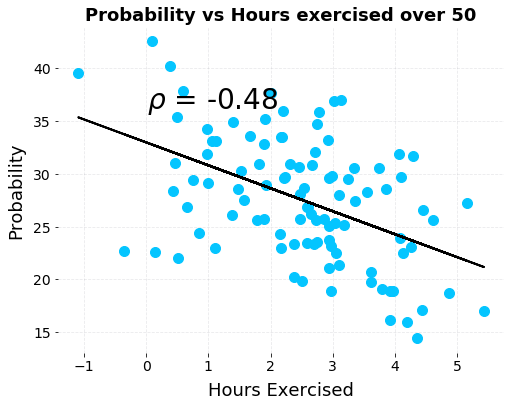

In [69]:
plot_relationship(under_50, 'Hours Exercised', '#04c5ff' )

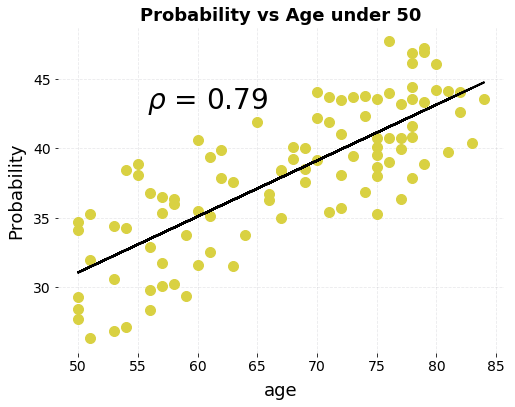

In [73]:
n_samples = 100
ages = np.random.randint(50, 85, n_samples)
hours = np.random.randint(5, 10, n_samples) + np.random.randn(n_samples) * 0.5
p = 25 + 0.4 * ages + -2 * hours + np.random.randn(n_samples) 
over_50 = pd.DataFrame({'age': ages, 'Hours Exercised': hours, 'probability': p})
plot_relationship(over_50, 'age', '#d9d142')

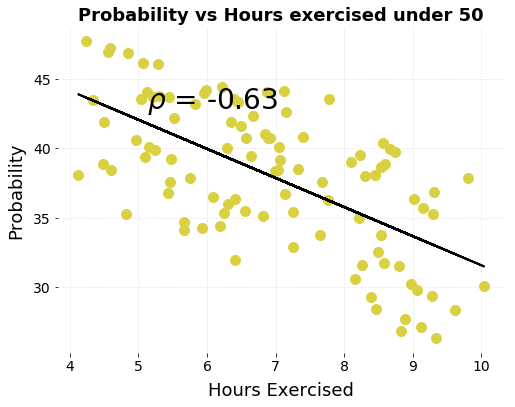

In [74]:
plot_relationship(over_50, 'Hours Exercised', '#d9d142')

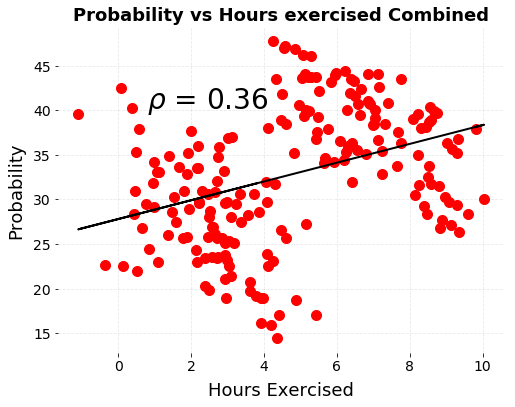

In [76]:
combined = pd.concat([under_50, over_50], axis = 0)
plot_relationship(combined, 'Hours Exercised', 'r')

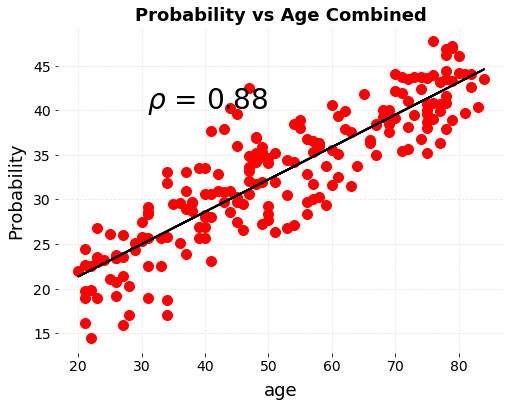

In [77]:
plot_relationship(combined, 'age', 'r')

In [79]:
colors = [ '#04c5ff' for _ in range(n_samples)]
colors.extend(['#d9d142' for _ in range(n_samples)])

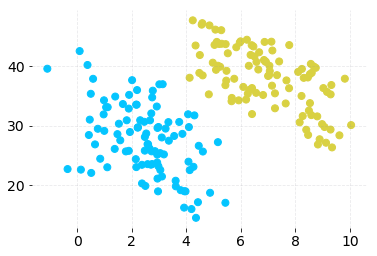

In [81]:
plt.scatter(combined['Hours Exercised'],
            combined['probability'], c = colors)